In [7]:
import pandas as pd
import statsmodels.api as sms
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.kde import gaussian_kde
import seaborn as sns
%matplotlib inline

In [28]:
df = pd.read_csv('/Users/tracylee/raw_dogs/clean_without_text.csv')

In [4]:
binary_fields = [u'animalAltered',u'animalDeclawed', u'animalHousetrained',
       u'animalMicrochipped', u'animalMixedBreed', u'animalNeedsFoster',
       u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',
       u'animalSpecialneeds', u'animalUptodate', 
       u'in_foster', u'Highly Active', u'Not Active',
       u'Slightly Active', u'animalAlterUnknown', u'animalDeclawedUnknown',
       u'animalMicrochippedUnknown', u'Adult', u'Baby', u'Senior', u'Young',
       u'Large', u'Medium', u'Small', u'X-Large', u'Indoor Only',
       u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive', u'Cautious',
       u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',
       u'animalOKWithDogsUnknown', u'animalOKWithKidsUnknown',
       u'animalSpecialneedsUnknown', u'animalUptodateUnknown', u'mostly_black',
       u'sex_male']

continuous_fields = [u'animalAdoptionFee',u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalNumPictures', u'animalNumVideos',
       u'animalSizeCurrent', u'animalSizePotential', u'age_at_start', 
       u'description_length',u'search_string_num_terms']

In [17]:
df = df[[u'animalAdoptionFee', u'animalAltered',
       u'animalBiggestPictures', u'animalBiggestVideos', u'animalDeclawed',
       u'animalHousetrained', u'animalMicrochipped', u'animalMixedBreed',
       u'animalNeedsFoster', u'animalNumPictures', u'animalNumVideos',
       u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',
       u'animalOrgID', u'animalSizeCurrent', u'animalSizePotential',
       u'animalSpecialneeds', u'animalUptodate', u'adopted', u'censored',
       u'time_range', u'age_at_start', u'has_url', u'in_foster',
       u'Highly Active', u'Not Active', u'Slightly Active',
       u'animalAlterUnknown', u'animalDeclawedUnknown',
       u'animalMicrochippedUnknown', u'Adult', u'Baby', u'Senior', u'Young',
       u'Large', u'Medium', u'Small', u'X-Large', u'Indoor Only',
       u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive', u'Cautious',
       u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',
       u'animalOKWithDogsUnknown', u'animalOKWithKidsUnknown',
       u'animalSpecialneedsUnknown', u'animalUptodateUnknown', u'mostly_black',
       u'tempAge', u'search_string_num_terms', u'sex_male',
       u'description_length']]

In [13]:
corr=df[continuous_fields+['time_range']].corr()

In [14]:
corr

,animalAdoptionFee,animalBiggestPictures,animalBiggestVideos,animalNumPictures,animalNumVideos,animalSizeCurrent,animalSizePotential,age_at_start,description_length,search_string_num_terms,time_range
animalAdoptionFee,1.000000,-0.005791,7.162458e-02,-1.217445e-02,-8.190106e-03,-0.029007,0.027704,-0.136037,0.080360,-0.018122,-0.032136
animalBiggestPictures,-0.005791,1.000000,-2.534159e-03,4.217802e-01,1.619268e-02,-0.037374,0.013203,0.028967,0.079465,0.035578,-0.126985
animalBiggestVideos,0.071625,-0.002534,1.000000e+00,8.336096e-13,-8.012211e-14,-0.014737,0.035246,-0.003206,0.037996,0.039884,-0.281022
animalNumPictures,-0.012174,0.421780,8.336096e-13,1.000000e+00,9.436263e-02,-0.029455,0.002253,0.014567,0.207613,0.069167,-0.164327
animalNumVideos,-0.008190,0.016193,-8.012211e-14,9.436263e-02,1.000000e+00,-0.001152,0.001696,0.013952,0.097358,0.048277,-0.059499
animalSizeCurrent,-0.029007,-0.037374,-1.473684e-02,-2.945469e-02,-1.152044e-03,1.000000,0.584475,0.001434,-0.017723,-0.015590,0.001864
animalSizePotential,0.027704,0.013203,3.524608e-02,2.253026e-03,1.696110e-03,0.584475,1.000000,0.042149,-0.033723,-0.021745,-0.068801
age_at_start,-0.136037,0.028967,-3.206082e-03,1.456749e-02,1.395170e-02,0.001434,0.042149,1.000000,0.089102,-0.129072,-0.015292
description_length,0.080360,0.079465,3.799556e-02,2.076125e-01,9.735819e-02,-0.017723,-0.033723,0.089102,1.000000,0.101586,-0.075840
search_string_num_terms,-0.018122,0.035578,3.988413e-02,6.916741e-02,4.827688e-02,-0.015590,-0.021745,-0.129072,0.101586,1.000000,-0.002586


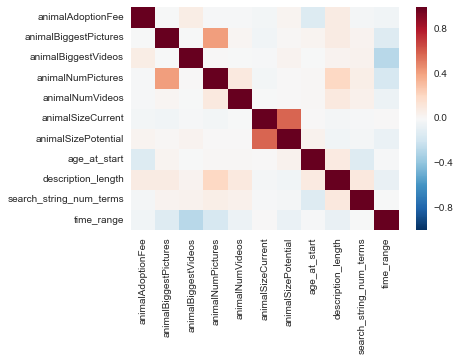

In [15]:
sns.heatmap(corr)

In [18]:
corr2 = df.corr()

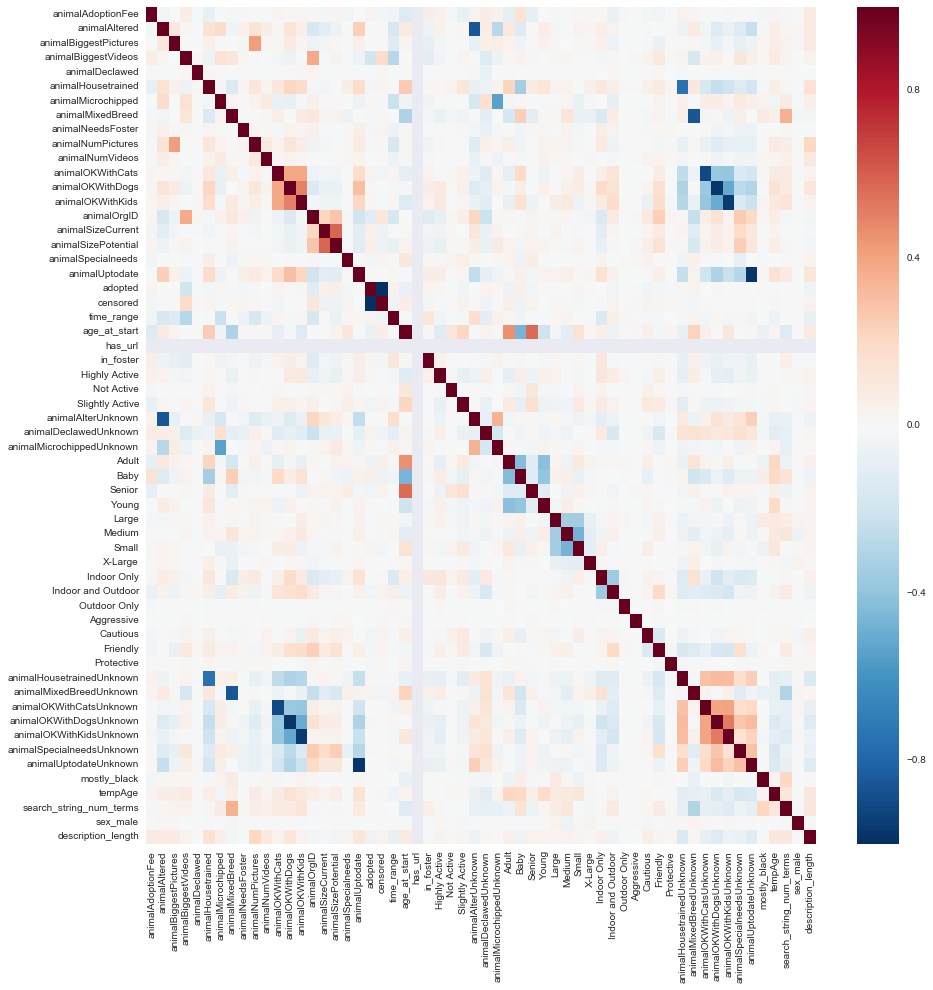

In [24]:
plt.rcParams['figure.figsize']=(15,15)
sns.heatmap(corr2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x155b3b6d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1593762d0>]], dtype=object)

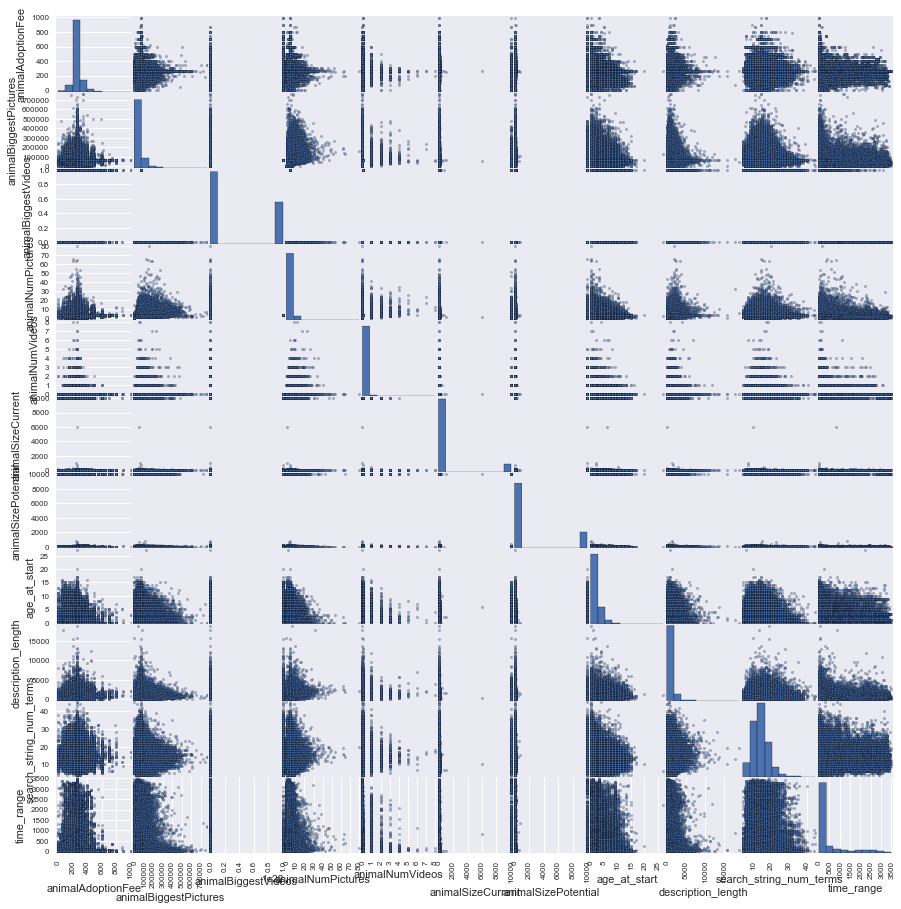

In [27]:
pd.scatter_matrix(df[continuous_fields+['time_range']])

(0, 200)

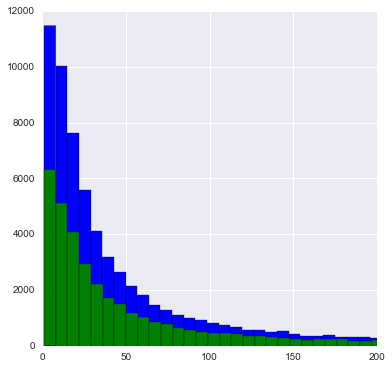

In [41]:
plt.rcParams['figure.figsize']=(6,6)
plt.hist(df[df['animalAltered']==1]['time_range'], color='blue', bins=500)
plt.hist(df[df['animalAlterUnknown']==1]['time_range'], color='green', bins=500)
plt.xlim(0,200)

In [42]:
df['adopted'].sum()

146443

In [57]:
counts= pd.DataFrame(df[binary_fields].sum())
counts.columns = ['counts']
counts.sort('counts', ascending=False)

/Users/tracylee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,counts
animalDeclawedUnknown,118324.0
animalOKWithDogs,117126.0
animalUptodate,112093.0
animalMixedBreed,99679.0
animalOKWithKids,91019.0
animalOKWithCatsUnknown,84753.0
animalAltered,82506.0
animalMicrochippedUnknown,77387.0
sex_male,76271.0
animalHousetrainedUnknown,74216.0


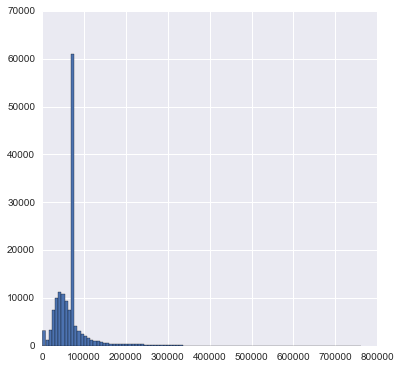

In [59]:
df['animalBiggestPictures'].hist(bins=100)

In [1]:
clean_df = pd.read_csv('data/clean_data_no_dummies.csv')

/Users/tracylee/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
clean_df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'animalActivityLevel',
       u'animalAdoptionFee', u'animalAltered', u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalBreed', u'animalColor',
       u'animalDeclawed', u'animalGeneralAge', u'animalGeneralSizePotential',
       u'animalHousetrained', u'animalIndoorOutdoor', u'animalMicrochipped',
       u'animalMixedBreed', u'animalNeedsFoster', u'animalNewPeople',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalPrimaryBreed', u'animalSearchString', u'animalSecondaryBreed',
       u'animalSex', u'animalSizeCurrent', u'animalSizePotential',
       u'animalSpecialneeds', u'animalUptodate', u'start_date', u'end_date',
       u'adopted', u'censored', u'time_range', u'age_at_start', u'has_url',
       u'in_foster', u'mostly_black', u'search_string_num_terms',
       u'description_length', u'has_video', u'desc_latent_topic', u'region',


In [64]:
df.columns

Index([u'animalAdoptionFee', u'animalAltered', u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalDeclawed', u'animalHousetrained',
       u'animalMicrochipped', u'animalMixedBreed', u'animalNeedsFoster',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalSizeCurrent', u'animalSizePotential', u'animalSpecialneeds',
       u'animalUptodate', u'adopted', u'censored', u'time_range',
       u'age_at_start', u'has_url', u'in_foster', u'Highly Active',
       u'Not Active', u'Slightly Active', u'animalAlterUnknown',
       u'animalDeclawedUnknown', u'animalMicrochippedUnknown', u'Adult',
       u'Baby', u'Senior', u'Young', u'Large', u'Medium', u'Small', u'X-Large',
       u'Indoor Only', u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive',
       u'Cautious', u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',

In [66]:
clean_df['search_string_num_terms'] = clean_df['animalSearchString'].apply(lambda x: len(str(x).split()))

In [68]:
clean_df['description_length'] = clean_df['animalDescriptionPlain'].apply(lambda x: len(str(x)))

In [69]:
clean_df.head()

,Unnamed: 0,animalActivityLevel,animalAdoptionFee,animalAltered,animalBiggestPictures,animalBiggestVideos,animalBreed,animalColor,animalDeclawed,animalDescriptionPlain,...,end_date,adopted,censored,time_range,age_at_start,has_url,in_foster,mostly_black,search_string_num_terms,description_length
0,0,NaN,NaN,1.0,96769.0,0.0,Boxer,NaN,NaN,IN NEED OF A FOSTER HOME UNTIL I CAN BE ADOPTE...,...,2012-04-22,1,0,47,7.0,1,0,0,5,1095
1,1,Moderately Active,NaN,1.0,95768.0,0.0,Labrador Retriever / Boxer / Mixed,Black,NaN,"Hi! My name is Bianca, and if you can believe ...",...,2010-11-23,1,0,136,5.0,1,0,1,13,478
2,2,Moderately Active,NaN,1.0,98461.0,0.0,Labrador Retriever / Boxer / Mixed,NaN,NaN,"I'm Mick, and I think I'm pretty darn handsome...",...,2010-11-23,1,0,136,5.0,1,0,0,10,794
3,3,NaN,NaN,1.0,84752.0,0.0,Boxer,NaN,NaN,IN NEED OF FOSTER CARE UNTIL I CAN BE ADOPTED....,...,2010-01-23,1,0,33,2.0,1,0,0,7,642
4,4,Moderately Active,$400.00,1.0,64542.0,0.0,Poodle (Toy),White,NaN,Pierre is a petite little man with short legs ...,...,2016-08-05,1,0,2562,3.0,1,0,0,8,965


In [71]:
clean_df = clean_df[[u'animalActivityLevel', u'animalAdoptionFee',
       u'animalAltered', u'animalBiggestPictures', u'animalBiggestVideos',
       u'animalBreed', u'animalColor', u'animalDeclawed',
       u'animalDescriptionPlain', u'animalGeneralAge',
       u'animalGeneralSizePotential', u'animalHousetrained',
       u'animalIndoorOutdoor', u'animalLocationState', u'animalMicrochipped',
       u'animalMixedBreed', u'animalNeedsFoster', u'animalNewPeople',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalPrimaryBreed', u'animalSearchString', u'animalSecondaryBreed',
       u'animalSex', u'animalSizeCurrent', u'animalSizePotential',
       u'animalSpecialneeds', u'animalUptodate', u'start_date', u'end_date',
       u'adopted', u'censored', u'time_range', u'age_at_start', u'has_url',
       u'in_foster', u'mostly_black', u'search_string_num_terms',
       u'description_length']]

In [302]:
clean_df.to_csv('/Users/tracylee/raw_dogs/clean_data_no_dummies.csv')

In [81]:
shit= pd.read_csv('/Users/tracylee/raw_dogs/clean_data_no_dummies.csv')

In [83]:
shit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152259 entries, 0 to 152258
Data columns (total 44 columns):
Unnamed: 0                    152259 non-null int64
animalActivityLevel           100425 non-null object
animalAdoptionFee             59376 non-null object
animalAltered                 94550 non-null float64
animalBiggestPictures         96174 non-null float64
animalBiggestVideos           96174 non-null float64
animalBreed                   152259 non-null object
animalColor                   124753 non-null object
animalDeclawed                32541 non-null float64
animalDescriptionPlain        143750 non-null object
animalGeneralAge              138897 non-null object
animalGeneralSizePotential    131268 non-null object
animalHousetrained            76945 non-null float64
animalIndoorOutdoor           81539 non-null object
animalLocationState           152259 non-null object
animalMicrochipped            73922 non-null float64
animalMixedBreed              110778 non-nul

In [91]:
shit['animalSex'].fillna('Female',inplace=True)

In [92]:
shit['animalSex'].value_counts()

Male      76275
Female    75984
Name: animalSex, dtype: int64

In [93]:
shit['animalDescriptionPlain'].fillna('', inplace=True)

In [95]:
shit = shit[shit['age_at_start']>=0]

In [96]:
shit.shape

(127634, 44)

In [106]:
clean_df['has_video'] = clean_df['animalNumVideos'].apply(lambda x: 1 if x>0 else 0)

In [109]:
clean_df['animalNumVideos'].value_counts()

0.0    92967
1.0     2734
2.0      317
3.0      102
4.0       37
5.0        9
6.0        4
8.0        2
7.0        2
Name: animalNumVideos, dtype: int64

In [116]:
clean_df['animalAdoptionFee'] = clean_df['animalAdoptionFee'].apply(lambda x: adoption_fee_parse(x))

In [113]:
import re
def adoption_fee_parse(x):
    if pd.isnull(x):
        return np.nan
    else:
        regex = re.findall(r'\d+', x)
        if len(regex)>0:
            return sum([float(num) for num in regex])
        else:
            return np.nan

In [118]:
clean_df['animalAdoptionFee'].fillna(clean_df['animalAdoptionFee'].mean(),inplace=True)

In [154]:
top_20_breeds = clean_df['animalPrimaryBreed'].value_counts().index[:20]

In [132]:
def plot_breed_trends(df):
    top_20_breeds = df['animalPrimaryBreed'].value_counts().index[:20]
    plt.subplots(figsize=(15, 8))
    lst = [clean_df[clean_df['animalPrimaryBreed']==breed]['time_range'] for breed in top_20_breeds]
    plt.boxplot(lst, labels=top_20_breeds)
    plt.ylim(0, 2000)
    plt.xlabel('Breed', fontsize=14)
    plt.ylabel('Adoption time', fontsize=14)
    plt.xticks(rotation=60)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]), <a list of 20 Text xticklabel objects>)

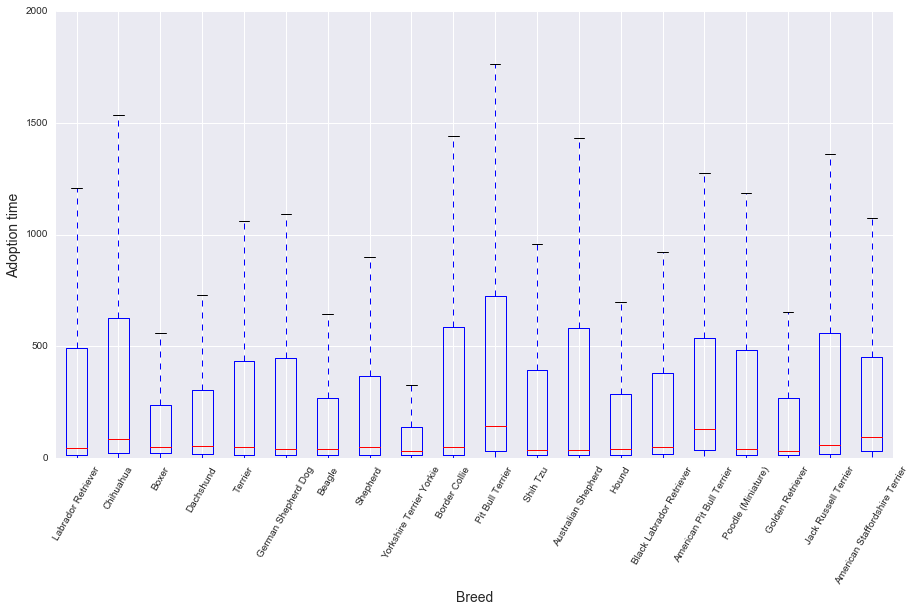

In [172]:
plt.subplots(figsize=(15, 8))
lst = [clean_df[clean_df['animalPrimaryBreed']==breed]['time_range'] for breed in top_20_breeds]
plt.boxplot(lst, labels=top_20_breeds)
plt.ylim(0, 2000)
plt.xlabel('Breed', fontsize=14)
plt.ylabel('Adoption time', fontsize=14)
plt.xticks(rotation=60)

In [135]:
df.columns

Index([u'animalAdoptionFee', u'animalAltered', u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalDeclawed', u'animalHousetrained',
       u'animalMicrochipped', u'animalMixedBreed', u'animalNeedsFoster',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalSizeCurrent', u'animalSizePotential', u'animalSpecialneeds',
       u'animalUptodate', u'adopted', u'censored', u'time_range',
       u'age_at_start', u'has_url', u'in_foster', u'Highly Active',
       u'Not Active', u'Slightly Active', u'animalAlterUnknown',
       u'animalDeclawedUnknown', u'animalMicrochippedUnknown', u'Adult',
       u'Baby', u'Senior', u'Young', u'Large', u'Medium', u'Small', u'X-Large',
       u'Indoor Only', u'Indoor and Outdoor', u'Outdoor Only', u'Aggressive',
       u'Cautious', u'Friendly', u'Protective', u'animalHousetrainedUnknown',
       u'animalMixedBreedUnknown', u'animalOKWithCatsUnknown',

In [3]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152259 entries, 0 to 152258
Data columns (total 47 columns):
Unnamed: 0                    152259 non-null int64
Unnamed: 0.1                  152259 non-null int64
animalActivityLevel           152259 non-null object
animalAdoptionFee             152259 non-null float64
animalAltered                 152259 non-null float64
animalBiggestPictures         152259 non-null float64
animalBiggestVideos           152259 non-null float64
animalBreed                   152259 non-null object
animalColor                   152259 non-null object
animalDeclawed                152259 non-null float64
animalGeneralAge              152259 non-null object
animalGeneralSizePotential    152259 non-null object
animalHousetrained            152259 non-null object
animalIndoorOutdoor           152259 non-null object
animalMicrochipped            152259 non-null object
animalMixedBreed              152259 non-null float64
animalNeedsFoster             152259 

In [177]:
clean_df.head()

,animalActivityLevel,animalAdoptionFee,animalAltered,animalBiggestPictures,animalBiggestVideos,animalBreed,animalColor,animalDeclawed,animalDescriptionPlain,animalGeneralAge,...,adopted,censored,time_range,age_at_start,has_url,in_foster,mostly_black,search_string_num_terms,description_length,has_video
0,NaN,265.08532,1.0,96769.0,0.0,Boxer,NaN,NaN,IN NEED OF A FOSTER HOME UNTIL I CAN BE ADOPTE...,Adult,...,1,0,47,7.0,1,0,0,5,1095,0
1,Moderately Active,265.08532,1.0,95768.0,0.0,Labrador Retriever / Boxer / Mixed,Black,NaN,"Hi! My name is Bianca, and if you can believe ...",Adult,...,1,0,136,5.0,1,0,1,13,478,0
2,Moderately Active,265.08532,1.0,98461.0,0.0,Labrador Retriever / Boxer / Mixed,NaN,NaN,"I'm Mick, and I think I'm pretty darn handsome...",Young,...,1,0,136,5.0,1,0,0,10,794,0
3,NaN,265.08532,1.0,84752.0,0.0,Boxer,NaN,NaN,IN NEED OF FOSTER CARE UNTIL I CAN BE ADOPTED....,NaN,...,1,0,33,2.0,1,0,0,7,642,0
4,Moderately Active,400.00000,1.0,64542.0,0.0,Poodle (Toy),White,NaN,Pierre is a petite little man with short legs ...,Adult,...,1,0,2562,3.0,1,0,0,8,965,0


In [205]:
clean_categorical= [ u'animalMicrochipped', ]
clean_numeric = [u'animalAltered',
       u'animalBiggestPictures', u'animalBiggestVideos', u'animalDeclawed', u'animalHousetrained',u'animalMixedBreed', u'animalNeedsFoster',
                 u'animalNumPictures', u'animalNumVideos',
       u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',u'animalSex', u'animalSizeCurrent',
       u'animalSizePotential', u'animalSpecialneeds', u'animalUptodate',u'age_at_start']

In [218]:
fill_with_unknown= ['animalActivityLevel', u'animalGeneralAge', u'animalGeneralSizePotential',
        u'animalIndoorOutdoor',u'animalNewPeople', 'animalColor', 'animalMicrochipped',
        u'animalPrimaryBreed',
       u'animalSecondaryBreed',u'animalHousetrained',u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',]
for field in fill_with_unknown:
    clean_df[field].fillna("Unknown", inplace=True)

In [213]:
fill_with_1 = [u'animalAltered',
         u'animalMixedBreed', 
         u'animalUptodate']

for field in fill_with_1:
    clean_df[field].fillna(1, inplace=True)
    
fill_with_0 = [u'animalDeclawed',u'animalNeedsFoster',u'animalSpecialneeds']
for field in fill_with_0:
    clean_df[field].fillna(0, inplace=True)

In [208]:
fill_with_mean = [u'animalBiggestPictures', u'animalBiggestVideos',u'animalNumPictures', u'animalNumVideos',]

for field in fill_with_mean:
    clean_df[field].fillna(clean_df[field].mean(), inplace=True)


In [222]:
clean_df.columns

Index([u'animalActivityLevel', u'animalAdoptionFee', u'animalAltered',
       u'animalBiggestPictures', u'animalBiggestVideos', u'animalBreed',
       u'animalColor', u'animalDeclawed', u'animalDescriptionPlain',
       u'animalGeneralAge', u'animalGeneralSizePotential',
       u'animalHousetrained', u'animalIndoorOutdoor', u'animalLocationState',
       u'animalMicrochipped', u'animalMixedBreed', u'animalNeedsFoster',
       u'animalNewPeople', u'animalNumPictures', u'animalNumVideos',
       u'animalOKWithCats', u'animalOKWithDogs', u'animalOKWithKids',
       u'animalOrgID', u'animalPrimaryBreed', u'animalSearchString',
       u'animalSecondaryBreed', u'animalSex', u'animalSizeCurrent',
       u'animalSizePotential', u'animalSpecialneeds', u'animalUptodate',
       u'start_date', u'end_date', u'adopted', u'censored', u'time_range',
       u'age_at_start', u'has_url', u'in_foster', u'mostly_black',
       u'search_string_num_terms', u'description_length', u'has_video'],
      dtype='

(array([1, 2, 3]), <a list of 3 Text xticklabel objects>)

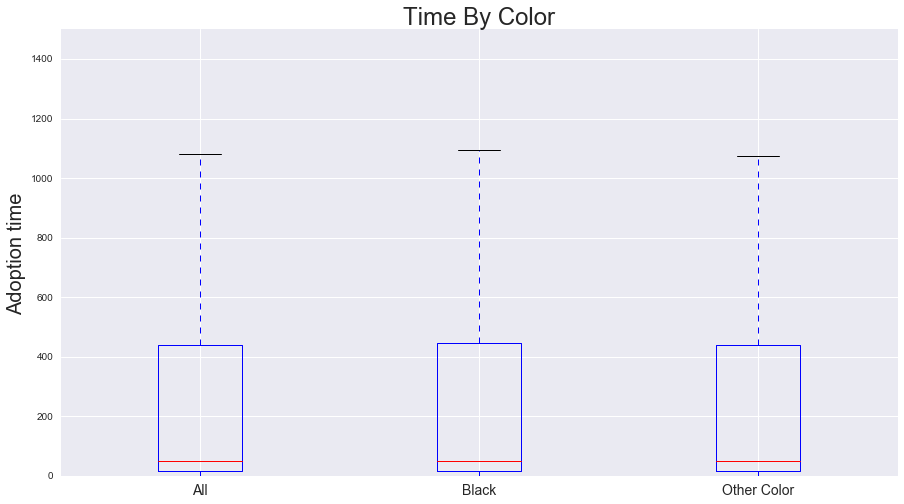

In [21]:
plt.subplots(figsize=(15, 8))
lst = [clean_df['time_range'], clean_df[clean_df['mostly_black']==1]['time_range'], clean_df[clean_df['mostly_black']==0]['time_range']]
plt.boxplot(lst, labels=['All', 'Black', 'Other Color'])
plt.ylim(0, 1500)
plt.ylabel('Adoption time', fontsize=20)
plt.title('Time By Color', fontsize=24)
plt.xticks(fontsize=14)

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

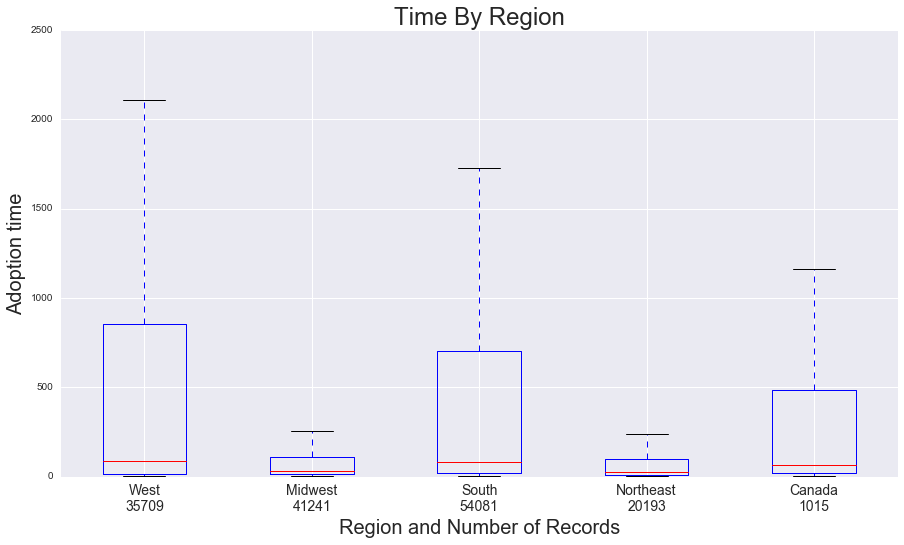

In [41]:
region_names = ['West', 'Midwest', 'South', 'Northeast', 'Canada']
regions = ["{}\n{}".format(region, clean_df[clean_df['region']==region]['time_range'].count())
           for region in region_names]
plt.subplots(figsize=(15, 8))
lst = [clean_df[clean_df['region']==region]['time_range'] for region in region_names]
plt.boxplot(lst, labels=regions)
plt.ylim(0, 2500)
plt.xlabel('Region and Number of Records',fontsize=20)
plt.ylabel('Adoption time', fontsize=20)
plt.title('Time By Region', fontsize=24)
plt.xticks(fontsize=14)

In [26]:
clean_df['region'].value_counts()

South        54081
Midwest      41241
West         35709
Northeast    20193
Canada        1015
Territory       20
Name: region, dtype: int64

In [29]:
df = pd.read_csv('data/clean_data_no_dummies.csv')

/Users/tracylee/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2705: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

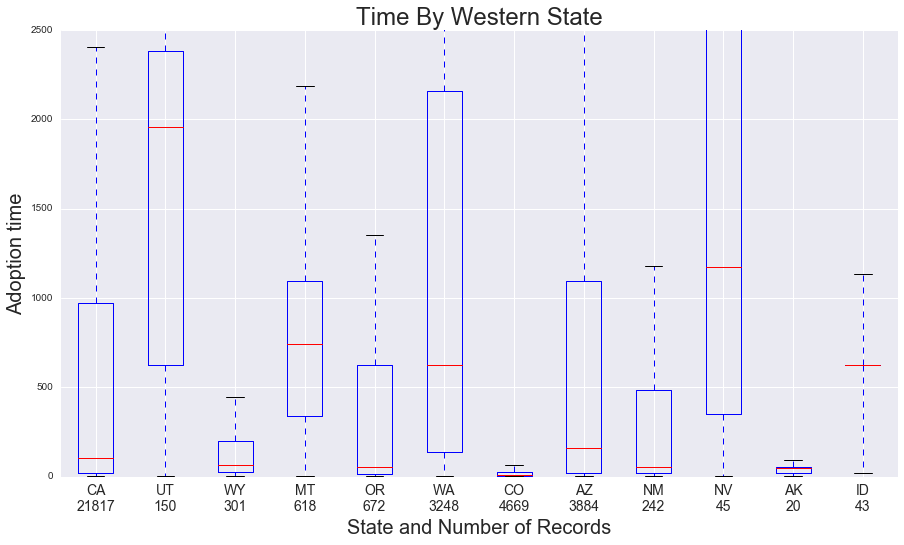

In [42]:
West = ['CA','UT','WY','MT', 'OR','WA',
            'CO','AZ','NM','NV', 'AK', 'ID']
regions = ["{}\n{}".format(region, df[df['animalLocationState']==region]['time_range'].count())
           for region in West]
plt.subplots(figsize=(15, 8))
lst = [df[df['animalLocationState']==region]['time_range'] for region in West]
plt.boxplot(lst, labels=regions)
plt.ylim(0, 2500)
plt.ylabel('Adoption time', fontsize=20)
plt.xlabel('State and Number of Records',fontsize=20)
plt.title('Time By Western State', fontsize=24)
plt.xticks(fontsize=14)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 <a list of 17 Text xticklabel objects>)

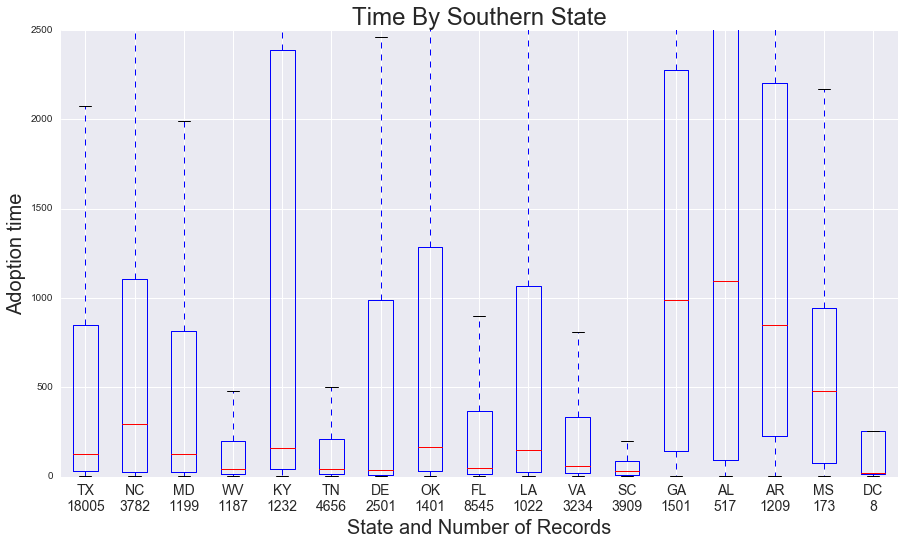

In [43]:
South = ['TX','NC','MD', 'WV', 'KY', 'TN',
            'DE', 'OK','FL','LA', 'VA','SC',
            'GA', 'AL','AR','MS','DC']
regions = ["{}\n{}".format(region, df[df['animalLocationState']==region]['time_range'].count())
           for region in South]
plt.subplots(figsize=(15, 8))
lst = [df[df['animalLocationState']==region]['time_range'] for region in South]
plt.boxplot(lst, labels=regions)
plt.ylim(0, 2500)
plt.ylabel('Adoption time', fontsize=20)
plt.xlabel('State and Number of Records',fontsize=20)
plt.title('Time By Southern State', fontsize=24)
plt.xticks(fontsize=14)

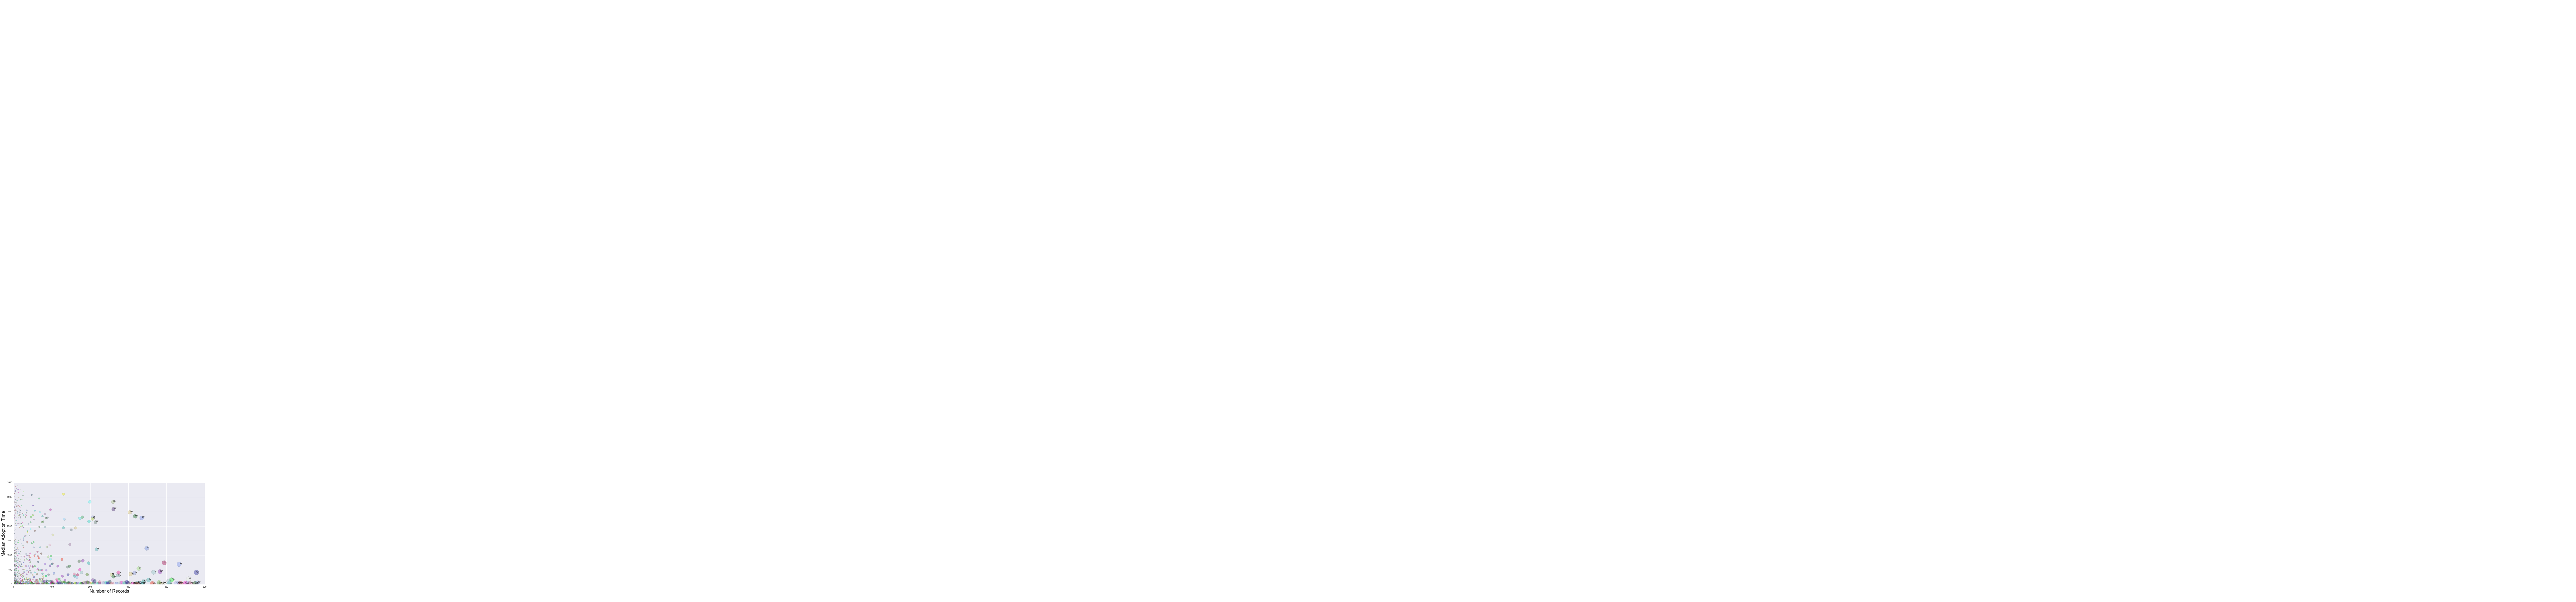

In [151]:
clean_df['animalLocationState'] = df['animalLocationState']
temp = clean_df[['animalOrgID','animalLocationState','time_range']].groupby(['animalOrgID','animalLocationState',]).agg(['median', 'count'])
temp = temp.reset_index()
org = temp['animalOrgID']
state = temp['animalLocationState']
mean = temp['time_range','median']
count = temp['time_range','count']


colors = pd.tools.plotting._get_standard_colors(len(temp['animalLocationState'].unique()), color_type='random')

fig, ax = plt.subplots(figsize=(15, 8))
plt.xlim(0, 500)
plt.ylim(0, 3500)
plt.ylabel('Median Adoption Time', fontsize=20)
plt.xlabel('Number of Records',fontsize=20)
plt.title('', fontsize=24)
plt.scatter(count,mean, s = count, c=colors, alpha=.4)

ax.set_color_cycle(colors)
for i, txt in enumerate(state):
    if count[i] > 300 and mean[i] < 200:
        ax.annotate(txt, (count[i],mean[i]))
    elif count[i] > 200 and mean[i] > 200:
        ax.annotate(txt, (count[i],mean[i]))

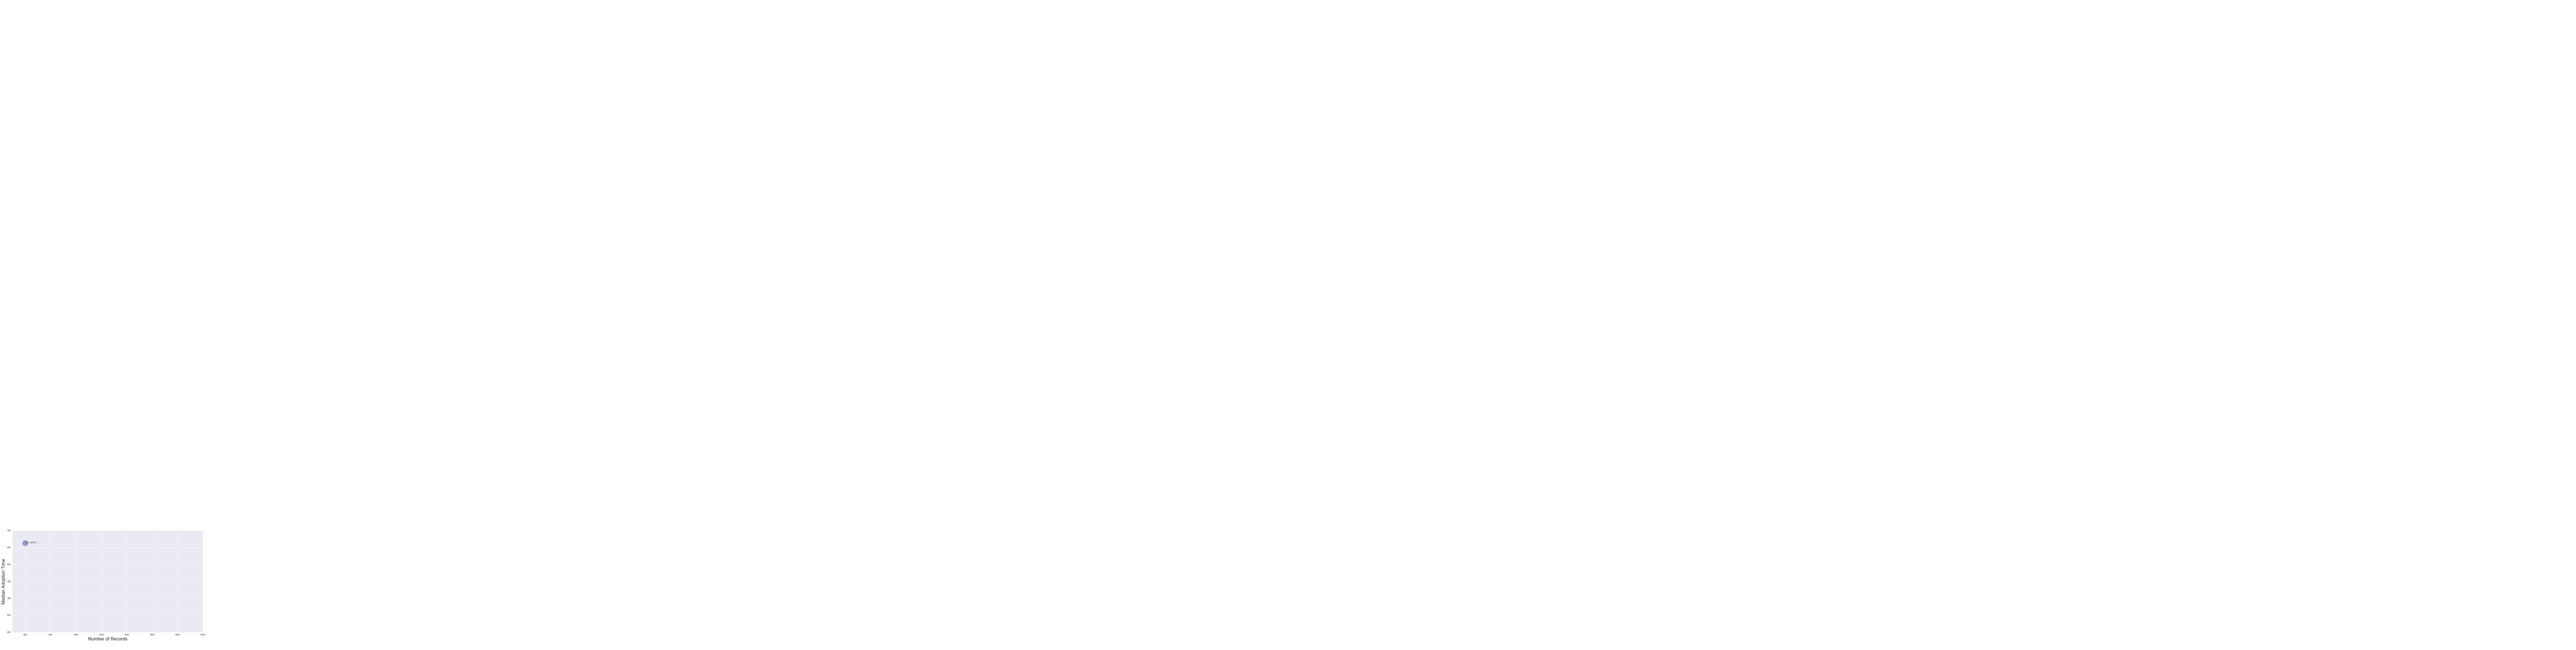

In [172]:
clean_df['animalLocationState'] = df['animalLocationState']
temp = clean_df[['animalOrgID','animalLocationState','time_range']].groupby(['animalOrgID','animalLocationState',]).agg(['median', 'count'])
temp = temp.reset_index()
org = temp['animalOrgID']
state = temp['animalLocationState']
mean = temp['time_range','median']
count = temp['time_range','count']


colors = pd.tools.plotting._get_standard_colors(len(temp['animalLocationState'].unique()), color_type='random')

fig, ax = plt.subplots(figsize=(15, 8))
plt.xlim(500,2000)
plt.ylim(200, 500)
plt.ylabel('Median Adoption Time', fontsize=20)
plt.xlabel('Number of Records',fontsize=20)
plt.title('', fontsize=24)
plt.scatter(count,mean, s = count, c=colors, alpha=.4)

ax.set_color_cycle(colors)
for i, txt in enumerate(state):
    if count[i] > 300 and mean[i] < 200:
        ax.annotate((str(txt)+": "+str(org[i])), (count[i],mean[i]))
    elif count[i] > 200 and mean[i] > 200:
        ax.annotate((str(txt)+": "+str(org[i])), (count[i],mean[i]))

In [171]:
clean_df[clean_df['animalOrgID']==993].describe()

,Unnamed: 0,animalAdoptionFee,animalAltered,animalBiggestPictures,animalBiggestVideos,animalDeclawed,animalMixedBreed,animalNeedsFoster,animalNumPictures,animalNumVideos,...,censored,time_range,age_at_start,has_url,in_foster,mostly_black,search_string_num_terms,description_length,has_video,desc_latent_topic
count,11350.000000,1.135000e+04,11350.000000,11350.000000,1.135000e+04,11350.0,11350.0,11350.000000,11350.000000,11350.000000,...,11350.000000,11350.000000,11283.000000,11350.0,11350.0,11350.000000,11350.000000,11350.000000,11350.000000,11350.000000
mean,107257.912952,2.650853e+02,0.992687,125659.255251,1.869103e+05,0.0,1.0,0.053833,6.119011,0.031392,...,0.010573,62.384758,1.781796,1.0,0.0,0.303084,14.558678,794.545815,0.013833,3.967048
std,21865.241842,4.217967e-11,0.085205,97762.653352,1.505723e+06,0.0,0.0,0.225697,3.498904,0.223769,...,0.102283,138.315078,2.230448,0.0,0.0,0.459611,3.386211,566.411793,0.116801,3.896309
min,73959.000000,2.650853e+02,0.000000,0.000000,0.000000e+00,0.0,1.0,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.0,0.0,0.000000,5.000000,1.000000,0.000000,0.000000
25%,92026.500000,2.650853e+02,1.000000,62947.500000,0.000000e+00,0.0,1.0,0.000000,3.935762,0.000000,...,0.000000,13.000000,0.000000,1.0,0.0,0.000000,12.000000,429.000000,0.000000,0.000000
50%,104995.500000,2.650853e+02,1.000000,68914.899703,0.000000e+00,0.0,1.0,0.000000,5.000000,0.000000,...,0.000000,27.000000,1.000000,1.0,0.0,0.000000,14.000000,650.000000,0.000000,2.000000
75%,122714.500000,2.650853e+02,1.000000,199957.500000,1.679700e+04,0.0,1.0,0.000000,8.000000,0.030577,...,0.000000,61.000000,3.000000,1.0,0.0,1.000000,17.000000,992.750000,0.000000,8.000000
max,151326.000000,2.650853e+02,1.000000,639214.000000,4.092887e+07,0.0,1.0,1.000000,43.000000,7.000000,...,1.000000,3282.000000,15.000000,1.0,0.0,1.000000,30.000000,18857.000000,1.000000,9.000000


(array([1, 2, 3, 4]), <a list of 4 Text xticklabel objects>)

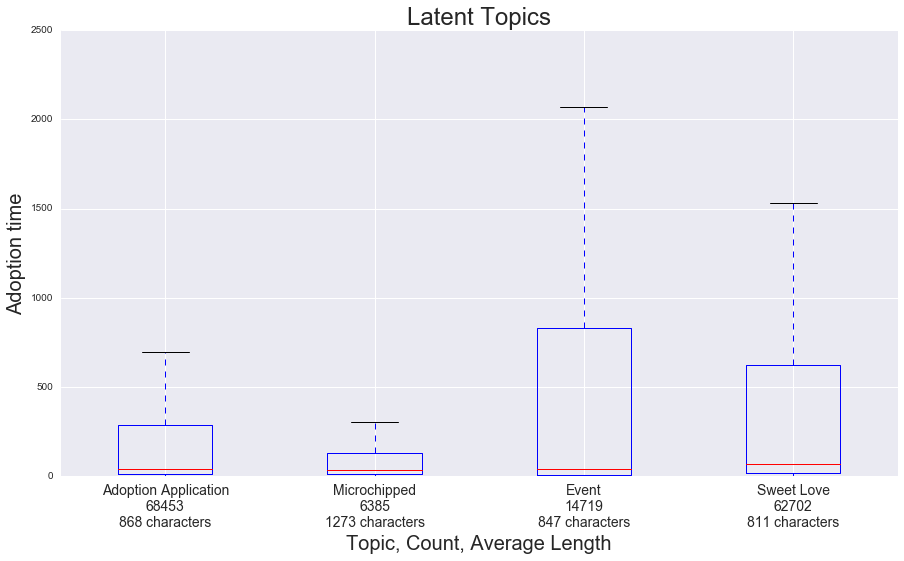

In [184]:
topics = range(0,4)
topic_names = ['Adoption Application', 'Microchipped', 'Event', 'Sweet Love']
regions = ["{}\n{}\n{} characters".format(topic_names[i], clean_df[clean_df['desc_latent_topic']==topic]['time_range'].count(),
            int(clean_df[clean_df['desc_latent_topic']==topic]['description_length'].mean()))
           for i,topic in enumerate(topics)]
plt.subplots(figsize=(15, 8))
lst = [clean_df[clean_df['desc_latent_topic']==region]['time_range'] for region in topics]
plt.boxplot(lst, labels=regions)
plt.ylim(0, 2500)
plt.xlabel('Topic, Count, Average Length', fontsize=20)
plt.ylabel('Adoption time', fontsize=20)
plt.title('Latent Topics', fontsize=24)
plt.xticks(fontsize=14)

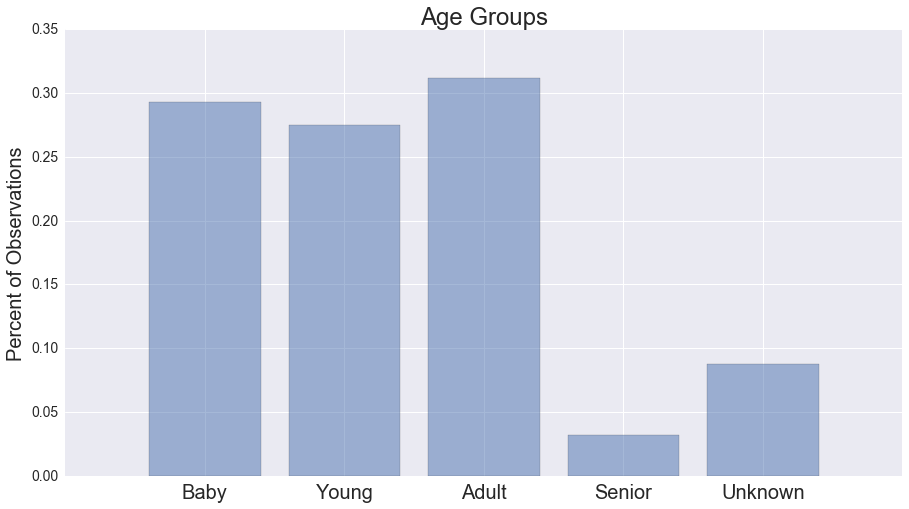

In [135]:
objects = ['Baby', 'Young', 'Adult', 'Senior', 'Unknown']
y_pos = np.arange(len(objects))
performance = [1.*(clean_df['animalGeneralAge']==object).sum()/clean_df.shape[0] for object in objects]
 
plt.subplots(figsize=(15, 8))    
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects, fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel('Percent of Observations', fontsize=20)
plt.title('Age Groups', fontsize=24)

In [4]:
clean_df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'animalActivityLevel',
       u'animalAdoptionFee', u'animalAltered', u'animalBiggestPictures',
       u'animalBiggestVideos', u'animalBreed', u'animalColor',
       u'animalDeclawed', u'animalGeneralAge', u'animalGeneralSizePotential',
       u'animalHousetrained', u'animalIndoorOutdoor', u'animalMicrochipped',
       u'animalMixedBreed', u'animalNeedsFoster', u'animalNewPeople',
       u'animalNumPictures', u'animalNumVideos', u'animalOKWithCats',
       u'animalOKWithDogs', u'animalOKWithKids', u'animalOrgID',
       u'animalPrimaryBreed', u'animalSearchString', u'animalSecondaryBreed',
       u'animalSex', u'animalSizeCurrent', u'animalSizePotential',
       u'animalSpecialneeds', u'animalUptodate', u'start_date', u'end_date',
       u'adopted', u'censored', u'time_range', u'age_at_start', u'has_url',
       u'in_foster', u'mostly_black', u'search_string_num_terms',
       u'description_length', u'has_video', u'desc_latent_topic', u'region',


In [210]:
clean_df['pitbull']=clean_df[u'animalBreed'].apply(lambda x: 1 if 'pit bull' in x.lower()
                                                   else 1 if 'bull terrier' in x.lower()
                                                   else 1 if 'staffordshire' in x.lower()
                                                   else 1 if 'american bulldog' in x.lower()
                                                   else 1 if 'bully' in x.lower()
                                                   else 0)

In [5]:
clean_df['Terrier']=clean_df[u'animalBreed'].apply(lambda x: 1 if 'terrior' in x.lower()
                                                   else 0)
clean_df['Hound']=clean_df[u'animalBreed'].apply(lambda x: 1 if 'hound' in x.lower()
                                                 else 1 if 'hund' in x.lower()
                                                   else 0)
clean_df['Herding']=clean_df[u'animalBreed'].apply(lambda x: 1 if 'herd' in x.lower()
                                                 else 1 if 'shep' in x.lower()
                                                else 1 if 'sheep' in x.lower()
                                                   else 1 if 'corgi' in x.lower()
                                                   else 1 if 'collie' in x.lower()
                                                   else 0)
clean_df['Working']=clean_df[u'animalBreed'].apply(lambda x: 1 if 'retriever' in x.lower()
                                                 else 1 if 'setter' in x.lower()
                                                else 1 if 'spaniel' in x.lower()
                                                   else 1 if 'pointer' in x.lower()
                                                   else 0)

In [212]:
clean_df['pitbull'].value_counts()

0    141562
1     10697
Name: pitbull, dtype: int64

In [196]:
temp2 = clean_df[['animalPrimaryBreed','time_range']].groupby(['animalPrimaryBreed']).agg(['median', 'count'])
temp2 = temp2.reset_index()

In [6]:
plt.subplots(figsize=(15, 8))
lst = [clean_df['time_range'], clean_df[clean_df['pitbull']==1]['time_range'], clean_df[clean_df['Terrier']==1]['time_range']
      , clean_df[clean_df['Hound']==1]['time_range'], clean_df[clean_df['Herding']==1]['time_range'], clean_df[clean_df['Working']==1]['time_range']]
plt.boxplot(lst, labels=['All', 'Pit Bull', 'Terrier', 'Hound', 'Herding', 'Working'])
plt.ylim(0, 1500)
plt.ylabel('Adoption time', fontsize=20)
plt.title('Time By Family', fontsize=24)
plt.xticks(fontsize=14)

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

In [216]:
clean_df['animalMixedBreed'].value_counts()

1.0    142127
0.0     10132
Name: animalMixedBreed, dtype: int64

In [219]:
clean_df['animalGeneralSizePotential'].unique()

array(['Medium', 'Unknown', 'Small', 'Large', 'X-Large'], dtype=object)

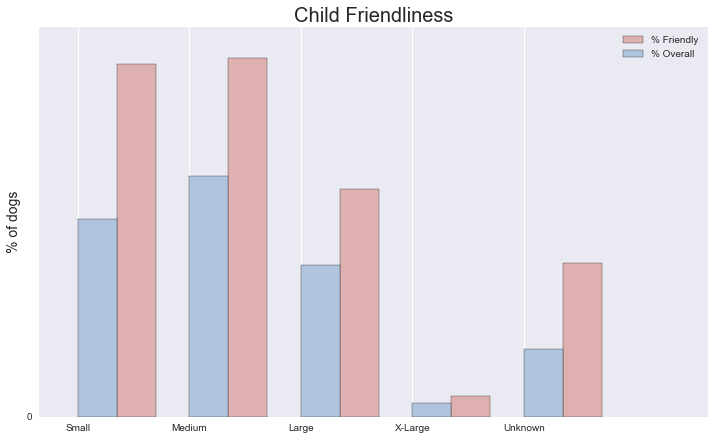

In [298]:
N = 5
sizes = ['Small', 'Medium', 'Large', 'X-Large', 'Unknown']
size_proportions = [1.*clean_df[clean_df['animalGeneralSizePotential']==size]['animalGeneralSizePotential'].count()/df.shape[0] for size in sizes]
ok_kids = [1.*clean_df[(clean_df['animalGeneralSizePotential']==size) & (clean_df['animalOKWithKids']=='1.0')]['animalGeneralSizePotential'].count()/df.shape[0] for size in sizes]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

fig = plt.figure(figsize=(10,6))
plt.bar(ind+2*width, size_proportions, width, color='#deb0b0')

plt.bar(ind+width, ok_kids, width, color='#b0c4de')

ax.set_xticks(ind+width)

plt.tight_layout()
ax2.yaxis.set_ticks_position("left")
ax2.yaxis.set_label_position("left")
plt.ylabel('% of dogs', fontsize=14)
plt.title('Child Friendliness', fontsize=20)
plt.xticks(ind + width, sizes)
plt.yticks(np.arange(0, .81, 10))
plt.legend(['% Friendly', '% Overall'])

In [273]:
clean_df['animalOKWithKids'].value_counts()

1.0        91798
Unknown    57018
0.0         3443
Name: animalOKWithKids, dtype: int64

In [301]:
type(clean_df['time_range'][0])

numpy.int64

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152259 entries, 0 to 152258
Data columns (total 51 columns):
Unnamed: 0                    152259 non-null int64
Unnamed: 0.1                  152259 non-null int64
animalActivityLevel           152259 non-null object
animalAdoptionFee             152259 non-null float64
animalAltered                 152259 non-null float64
animalBiggestPictures         152259 non-null float64
animalBiggestVideos           152259 non-null float64
animalBreed                   152259 non-null object
animalColor                   152259 non-null object
animalDeclawed                152259 non-null float64
animalGeneralAge              152259 non-null object
animalGeneralSizePotential    152259 non-null object
animalHousetrained            152259 non-null object
animalIndoorOutdoor           152259 non-null object
animalMicrochipped            152259 non-null object
animalMixedBreed              152259 non-null float64
animalNeedsFoster             152259 

(array([1, 2, 3, 4, 5]), <a list of 5 Text xticklabel objects>)

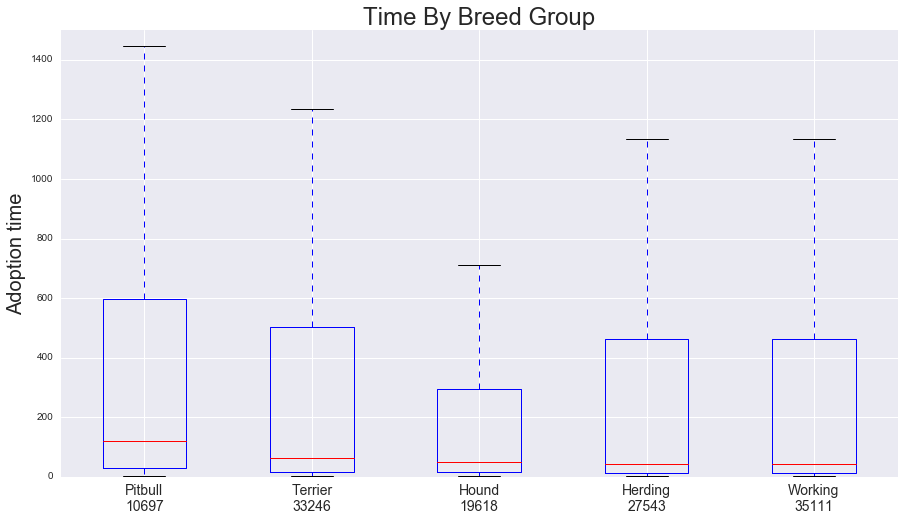

In [17]:
plt.subplots(figsize=(15, 8))
breed_groups = ['Pitbull', 'Terrier', 'Hound', 'Herding', 'Working']
lst = [clean_df[clean_df[breed]==1]['time_range'] for breed in breed_groups]
labels = ['{}\n{}'.format(breed,clean_df[clean_df[breed]==1]['time_range'].count()) for breed in breed_groups]
plt.boxplot(lst, labels=labels)
plt.ylim(0, 1500)
plt.ylabel('Adoption time', fontsize=20)
plt.title('Time By Breed Group', fontsize=24)
plt.xticks(fontsize=14)